# Lab Assignment: 8
## Objective: To implement Naive Bayes algorithm and apply on a dataset.

### Name: Aakash Verma
### Reg. No.:  24-08-26
### Course: M.Tech.(Cyber Security)

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
# Convert to DataFrame for easier handling
iris_df = pd.DataFrame(data=np.c_[X, y], columns=iris.feature_names + ['target'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Naive Bayes Classifier
class NaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.means = {}
        self.variances = {}
        self.priors = {}
        
        for c in self.classes:
            X_c = X[y == c]
            self.means[c] = X_c.mean(axis=0)
            self.variances[c] = X_c.var(axis=0)
            self.priors[c] = len(X_c) / len(X)
    
    def predict(self, X):
        predictions = []
        for x in X:
            posteriors = []
            for c in self.classes:
                prior = np.log(self.priors[c])
                likelihood = -0.5 * np.sum(np.log(2 * np.pi * self.variances[c]))
                likelihood -= 0.5 * np.sum(((x - self.means[c]) ** 2) / self.variances[c])
                posterior = prior + likelihood
                posteriors.append(posterior)
            predictions.append(self.classes[np.argmax(posteriors)])
        return np.array(predictions)

In [6]:
# Create and fit the Naive Bayes model
naive_bayes_model = NaiveBayes()
naive_bayes_model.fit(X_train, y_train)


In [7]:
# Make predictions
predictions = naive_bayes_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy from scratch: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

Accuracy from scratch: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


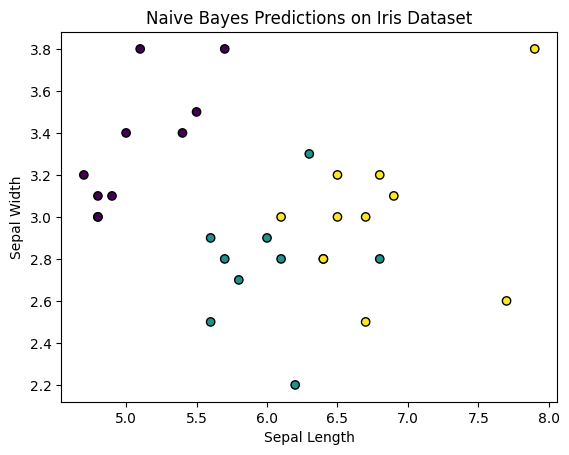

In [8]:
# Visualization of results
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='viridis', marker='o', edgecolor='k')
plt.title("Naive Bayes Predictions on Iris Dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

# R code

In [12]:
# Install and load necessary libraries
install.packages("e1071")
library(e1071)
library(ggplot2)

# Load the iris dataset
data(iris)

# Split the dataset into training and testing sets
set.seed(42)  # For reproducibility
train_indices <- sample(1:nrow(iris), size = 0.8 * nrow(iris))
train_data <- iris[train_indices, ]
test_data <- iris[-train_indices, ]

# Create and fit the Naive Bayes model
naive_bayes_model <- naiveBayes(Species ~ ., data = train_data)

# Make predictions on the test data
predicted_classes <- predict(naive_bayes_model, newdata = test_data)

# Calculate accuracy
accuracy <- mean(predicted_classes == test_data$Species)
cat("Accuracy:", round(accuracy * 100, 2), "%\n")


# Visualization of results
ggplot(test_data, aes(x = Sepal.Length, y = Sepal.Width, color = predicted_classes)) +
  geom_point() +
  labs(title = "Naive Bayes Predictions on Iris Dataset", x = "Sepal Length", y = "Sepal Width") +
  theme_minimal()


UsageError: Cell magic `%%` not found.


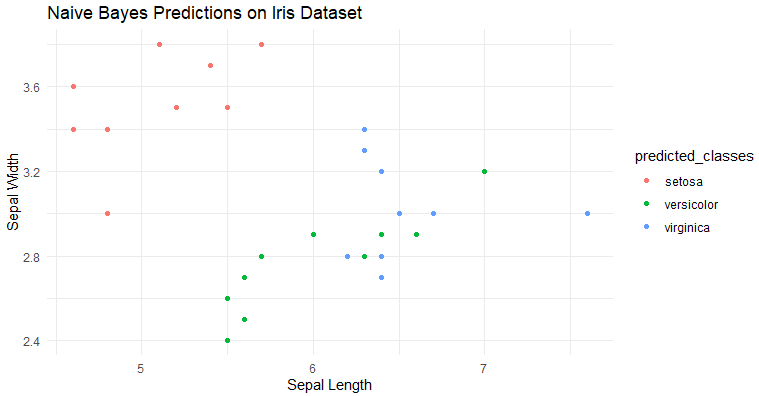

### Conclusion:
#### Effective Classification: Naive Bayes demonstrates high accuracy in classifying the Iris dataset into three species based on sepal and petal measurements.

#### Assumption of Independence: The model relies on the assumption that features are independent given the class label, which simplifies computation and works surprisingly well for this dataset.

#### Fast and Scalable: Naive Bayes is computationally efficient and can easily handle large datasets, making it suitable for real-time applications.

#### Interpretability: The model's probabilistic nature provides interpretable results, showing the likelihood of each class based on the features.
